# Analyzing A Network of Synaptic Interactions [100 Points]

In [234]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp

## stephen
import pandas as pd

## Part I

#### Part I-1

C:\Users\sshepherd\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


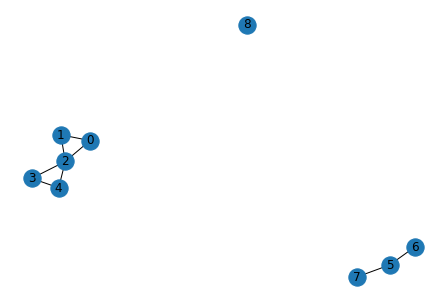

In [235]:
g = nx.Graph()

edges = [
    (0,1), (0,2),
    (1,2),
    (2,3), (2,4),
    (3,4),
    (5,6),(5,7)
]

g.add_edges_from(edges)
g.add_node(8)

nx.draw(g, with_labels=True)

#### Part I-2.a

In [236]:
g = nx.read_graphml(
    'Assignment1_Part1-2_cities_data.graphml')

nodes = list(g.nodes(data=True))
edges = list(g.edges(data=True))

print(len(nodes))
print(len(edges))
print(len([e for e in edges if e[2]['weight'] < 50]))
print()
print(nodes[0:5])
print()
print(edges[0:5])

128
8128
8

[('Youngstown, OH', {}), ('Yankton, SD', {}), ('Yakima, WA', {}), ('Worcester, MA', {}), ('Wisconsin Dells, WI', {})]

[('Youngstown, OH', 'Yankton, SD', {'weight': 966}), ('Youngstown, OH', 'Yakima, WA', {'weight': 2410}), ('Youngstown, OH', 'Worcester, MA', {'weight': 604}), ('Youngstown, OH', 'Wisconsin Dells, WI', {'weight': 595}), ('Youngstown, OH', 'Winston-Salem, NC', {'weight': 494})]


Type your answer for Part I-2.a here
_______________________________________________________________________________

number of nodes: 128

number of edges: 8128

number of the pairs : 8


#### Part I-2.b

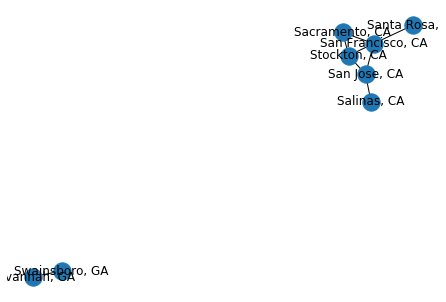

In [237]:
#Implement your code and show the visualization of Question 4
def cities_within_100(G, city_list):
    '''
    Input
    G: graph
    city_list: list of strings (names of cities in G)

    Output
    S: subgraph of G that only contains edges between cities in “city_list” and directly neighboring cities that are less than 100 miles away
    '''
    sg = nx.Graph()

    sg.add_edges_from(
        [e for e in list(G.edges(data=True)) if e[2]['weight'] < 100]
    )
    
    neighbors = set()
    for c in city_list:
        neighbors.add( c )
        nbrs =  list( sg.neighbors(c) )
        [neighbors.add( n ) for n in nbrs]
    
    return sg.subgraph(list(neighbors))

g = nx.read_graphml(
    'Assignment1_Part1-2_cities_data.graphml')


S = cities_within_100(
    g,
    ["Savannah, GA", "Santa Rosa, CA", "San Francisco, CA", "San Jose, CA"]
)

nx.draw(S, with_labels=True)

#### Part I-3

In [238]:
n = 10

cycl = nx.cycle_graph(n)
cliq = nx.complete_graph(n)
star = nx.star_graph(n - 1) ## for star graph, nodes are from 0 to in with 0 as center

print('max abs eigval','max degree','avg degree', sep='\t')
for g in ['cycl','cliq','star']:
    print(g,':')
    g = globals()[g]
    print(
        #np.round(max(np.abs(np.linalg.eig( nx.to_numpy_matrix(g) )[0])), 2),
        np.round(max(np.linalg.eig( nx.to_numpy_matrix(g) )[0]), 2),
        np.max(list(dict(g.degree).values())),
        np.mean(list(dict(g.degree).values())),
        sep='\t'
    )
    print()

max abs eigval	max degree	avg degree
cycl :
2.0	2	2.0

cliq :
9.0	9	9.0

star :
3.0	9	1.8



Type your answer for Part I-3 here
_______________________________________________________________________________

Cycle:  Max Eigval: 2, Max Degree: 2, Avg Degree: 2

Clique: Max Eigval: 9, Max Degree: 9, Avg Degree: 9

Star:   Max Eigval: 3, Max Degree: 9, Avg Degree: 1.8


For Cycle and Clique, the largest eigenvalue of the adjacency matrix is equal to the maximum and average degrees of each network.  For Cycle, this will always be 2 and for Clique this will be n - 1.

For Star, the largest eigenvalue of the adjacency matrix is equal to sqrt(n - 1).

## PART II

#### Part II-1

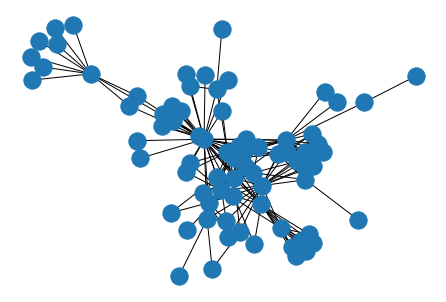

In [239]:
g = nx.read_gml(
    'Assignment1_Part2_lesmis_data.gml')

nx.draw(g)

In [240]:
print(nx.is_connected(g))

True


Type your answer for Part II-1 here
__________________________________

Yes, this undirected graph is connected, based on nx.is_connected(g) above.

#### Part II-2

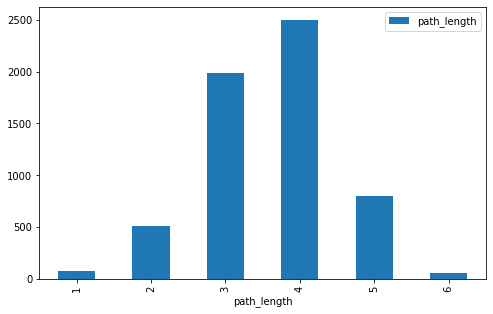

In [241]:
# ## edges weighted to one
# one_edges = []
# for e in g.edges(data=True):
#     one_edges.append((e[0], e[1], {'value': 1}))
g_ones = nx.Graph()
g_ones.add_edges_from(g.edges())

sp_vals = []
sp = nx.shortest_path(g_ones)
sp_vals = list(pd.json_normalize(sp).to_dict().values())
sp_vals = [len(spv[0]) for spv in sp_vals]

(
    pd.DataFrame(data={'path_length': sp_vals})
    .groupby('path_length')
    .agg({'path_length':'count'})
    .plot(kind='bar', figsize=[8,5])
)

#### Part II-3

In [242]:
degrees = list(dict(g.degree(weight='value')).items())

degrees_df = pd.DataFrame(degrees, columns=['character','weight']).sort_values(by='weight', ascending=False)
degrees_df['probability'] = degrees_df.weight / sum(degrees_df.weight)

degrees_df.head(10)

,character,weight,probability
11,Valjean,158,0.096341
55,Marius,104,0.063415
58,Enjolras,91,0.055488
62,Courfeyrac,84,0.051220
59,Combeferre,68,0.041463
26,Cosette,68,0.041463
64,Bossuet,66,0.040244
25,Thenardier,61,0.037195
48,Gavroche,56,0.034146
27,Javert,47,0.028659


Type your answer for Part II-3 here
_______________________________________________________________________________

Top 3 characters:
- Valjean
- Marius
- Enjolras

## Part III

In [243]:
g = nx.read_graphml('Assignment1_Part3_drosophila_medulla_data.graphml')

print(g.is_directed(), g.number_of_nodes(), g.number_of_edges())

True 1781 33641


#### Part III-1

In [244]:
wcc = [len(c) for c in sorted(nx.weakly_connected_components(g), key=len, reverse=True)]
print(wcc[:10])
print(wcc[0] / g.number_of_nodes())

[1770, 3, 2, 2, 2, 2]
0.9938236945536215


Type your answer for Part III-1 here
__________________________________

- 99%

#### Part III-2

In [245]:
scc = [len(c) for c in sorted(nx.strongly_connected_components(g), key=len, reverse=True)]
print(scc[:10])
print(scc[0] / g.number_of_nodes())

[785, 2, 1, 1, 1, 1, 1, 1, 1, 1]
0.4407636159460977


Type your answer for Part III-2 here
_______________________________________________________________________________
- 44%

#### Part III-3

785
785


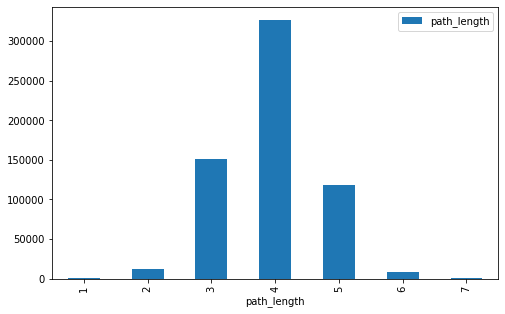

In [246]:
largest_scc = sorted(nx.strongly_connected_components(g), key=len, reverse=True)[0]
print(len(largest_scc))

sg = g.subgraph(largest_scc)
print(sg.number_of_nodes())

g_ones = nx.Graph()
g_ones.add_edges_from(sg.edges())

sp_vals = []
sp = nx.shortest_path(g_ones)
sp_vals = list(pd.json_normalize(sp).to_dict().values())
sp_vals = [len(spv[0]) for spv in sp_vals]

(
    pd.DataFrame(data={'path_length': sp_vals})
    .groupby('path_length')
    .agg({'path_length':'count'})
    .plot(kind='bar', figsize=[8,5])
)

## PART IV

#### Part IV-1 

In [247]:
edges = []

with open('Assignment1_Part4_github_data.txt') as f:
    for line in f.readlines():
        vals = line.split(' ')
        user    = 'user_' + vals[0]
        project = 'project_' + vals[1]
        edges.append((user,project))

users = list(set([e[0] for e in edges]))
projects = list(set([e[1] for e in edges]))

g = nx.Graph()
g.add_nodes_from(users, bipartite=0)
g.add_nodes_from(projects, bipartite=1)
g.add_edges_from(edges)

print('graph summary:')
print(nx.algorithms.bipartite.is_bipartite(g), g.number_of_nodes(), g.number_of_edges())

print('biadjacency matrix:')
user_nodes = {n for n, d in g.nodes(data=True) if d["bipartite"] == 0}
project_nodes = {n for n, d in g.nodes(data=True) if d["bipartite"] == 1}
print(len(user_nodes), len(project_nodes))

biadj = nx.algorithms.bipartite.biadjacency_matrix(g, row_order=user_nodes, column_order=project_nodes)

print('co-citation and bibliographic coupling:')
citation = (np.transpose(biadj) * biadj).tocoo()
citation.setdiag(0)
biblio   = (biadj * np.transpose(biadj)).tocoo()
biblio.setdiag(0)

print(citation.shape)
print(biblio.shape)

def get_argmax_coordinates(coo_matrix):

    arg_max = coo_matrix.data.argmax()
    max_val = coo_matrix.data[arg_max]
    max_row = coo_matrix.row[arg_max]
    max_col = coo_matrix.col[arg_max]

    return {'max_val': max_val, 'max_row': max_row, 'max_col': max_col}

print('\nhighest couples:')
user_coupling = get_argmax_coordinates(biblio)
print(list(user_nodes)[user_coupling['max_row']], list(user_nodes)[user_coupling['max_col']],
      user_coupling['max_val'], 'shared projects', sep='\t')

project_coupling = get_argmax_coordinates(citation)
print(list(project_nodes)[project_coupling['max_row']], list(project_nodes)[project_coupling['max_col']],
      project_coupling['max_val'], 'shared users', sep='\t')

graph summary:
True 177386 440237
biadjacency matrix:
56519 120867
co-citation and bibliographic coupling:
(120867, 120867)
(56519, 56519)

highest couples:
user_325	user_655	270	shared projects
project_299	project_17	954	shared users


Type your answer for Part IV-1 here
_______________________________________________________________________________
People with most number of shared memberships:
- user_325 & user_655

In [248]:
#Part IV-2 (Continue)
#Implement your code and write the answer in the Markdown cell right below

Type your answer for Part IV-2 here
_______________________________________________________________________________

Projects with most number of shared users:
- project_299 & project_17

## PART V

#### Part V-1

In [249]:
edges = []
cnt = 0
with open('Assignment1_Part5_language_data.txt') as f:
    for line in f.readlines():
        cnt += 1
        vals = line.split()
        lang_influenced = vals[0]
        lang_influencer = vals[1]
        edges.append((lang_influencer,lang_influenced))
        #print(cnt, vals)

g = nx.DiGraph()
g.add_edges_from(edges)
print(g.is_directed(), g.number_of_nodes(), g.number_of_edges())

print('\nis DAG?:', nx.algorithms.dag.is_directed_acyclic_graph(g))

True 362 740

is DAG?: False


Type your answer for Part V-1 here
_______________________________________________________________________________

- Not a DAG

#### Part V-2

In [250]:
while not nx.algorithms.dag.is_directed_acyclic_graph(g):
    cycles = sorted(nx.algorithms.cycles.find_cycle(g))
    print('removing cycle:', cycles)
    g.remove_edge(cycles[0][0], cycles[0][1])

print('\nis DAG?:', nx.algorithms.dag.is_directed_acyclic_graph(g))

removing cycle: [('clean', 'haskell'), ('haskell', 'clean')]
removing cycle: [('dylan', 'eulisp'), ('eulisp', 'dylan')]

is DAG?: True


#### Part V-3

In [255]:
print('topological sort (first 5 and last 5):')
ts = list(nx.algorithms.dag.topological_sort(g))
print(ts[0:5], ts[-5:], sep='\n')

print('num source languages:')
print(len(set([e[0] for e in g.edges()])))

print('\ntop influence (direct or indirect):')
node_descendants = []

for n in g.nodes():
    desc = nx.algorithms.dag.descendants(g, n)
    node_descendants.append((n, len(desc)))#, desc))
    
sorted(node_descendants, key=lambda x: x[1], reverse=True)[0:5]

topological sort (first 5 and last 5):
['digital_command_language', 'as/400_control_language', 'quickbasic', 'sp/k', 'sequel']
['cobra', 'cel_(programming_language)', 'boo', 'mirah', 'genie']
num source languages:
183

top influence (direct or indirect):


[('speedcoding', 242),
 ('fortran', 241),
 ('algol_58', 237),
 ('algol_60', 231),
 ('ipl', 183)]

Type your answer for Part V-3 here
_______________________________________________________________________________
- 183 "source" languages
- 'speedcoding' is the top influencer (via direct/indirect)

## Conda requirements

In [252]:
! conda list -e > requirements.txt

# END